### Phonon dispersion

In [1]:
from pyiron import Project

In [3]:
potential =  'FeH-NNIP'

In [4]:
pr = Project("Phonon")

min_job = pr.create.job.Lammps("min_job", delete_existing_job=True)
min_job.structure = pr.create.structure.ase.bulk("Fe", cubic=True).repeat([3,3,3])
min_job.potential = potential
min_job.calc_minimize(pressure=0.0)
min_job.run(delete_existing_job=True)

job = pr.create.job.Lammps("ref_job", delete_existing_job=True)
job.structure = min_job.get_structure(-1)
job.potential = potential

ha = pr.create.job.PhonopyJob("ha_job",  delete_existing_job=True)
ha.ref_job = job
ha.run(delete_existing_job=True)

The job min_job was saved and received the ID: 10194
The job ha_job was saved and received the ID: 10195
The job ref_job_0 was saved and received the ID: 10196


<Axes: title={'center': 'Bandstructure'}, xlabel='Bandpath', ylabel='Frequency [THz]'>

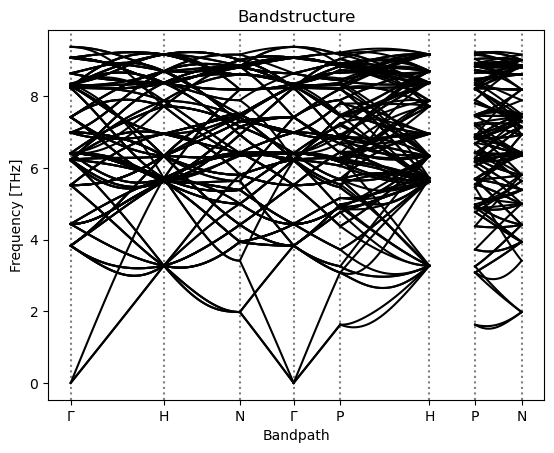

In [5]:
ha.plot_band_structure()

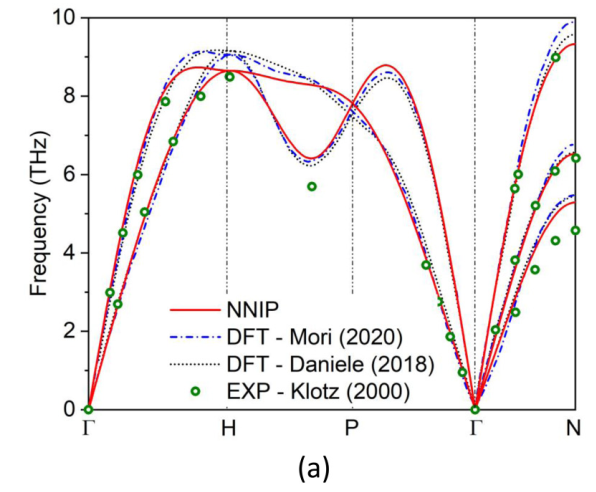